# Polynômes de chaos pour la poutre encastrée ; Sensibilité au degré du polynôme

On considère le cas de la déviation verticale de la poutre encastrée.

Dans ce notebook, on expérimente avec le degré du polynôme du chaos. On observe comment cela impacte le $Q^2$.

On considère ici un polynôme de chaos creux par moindres carrés avec une règle d'énumération linéaire. Dans un premier temps, on utilise la famille de polynômes orthogonaux pour chaque variable aléatoire, y compris la variable F, de loi log-normale.

On observe que, avec un polynôme de degré total égal à 5, il faut au moins 50 expériences dans l'apprentissage pour estimer le Q2 avec suffisamment de robustesse. Avec un degré égal à 5, si on utilise moins d'expériences, alors il arrive, en fonction de l'échantillon, que le Q2 soit très mauvais (inférieur à 0.5). Avec un plan de taille 25, il est plus prudent d'utiliser un polynôme de degré 2 au plus. Avec un plan de taille 9, même un polynôme de degré 1 peut ne pas produire un Q2 satisfaisant.

La variable log-normale peut poser des difficultés car les polynômes orthogonaux associés ne sont pas denses dans L2. Pour voir si cela a une influence dans ce cas particulier, on utilise des polynômes d'Hermite pour la variable F. Ce choix tendrai plutôt à dégrader la performance en termes de Q2. Avec un plan d'expériences d'apprentissage de taille 50, la performance se dégrade lorsque le degré du polynôme dépasse 3, ce qui est moins sensible avec la famille des polynômes orthogonalisés pour la loi log-normale.

In [1]:
import openturns as ot
import numpy as np
import openturns.viewer
import pylab as plt

In [2]:
dist_E = ot.Beta(0.9, 3.1, 2.8e7, 4.8e7)
dist_E.setDescription(["E"])
F_para = ot.LogNormalMuSigma(3.0e4, 9.0e3, 15.0e3) # in N
dist_F = ot.ParametrizedDistribution(F_para)
dist_F.setDescription(["F"])
dist_L = ot.Uniform(250., 260.) # in cm
dist_L.setDescription(["L"])
dist_I = ot.Beta(2.5, 4, 310., 450.) # in cm^4
dist_I.setDescription(["I"])

myDistribution = ot.ComposedDistribution([dist_E, dist_F, dist_L, dist_I])

dim_input = 4 # dimension of the input
dim_output = 1 # dimension of the output

def function_beam(X):
    E, F, L, I = X
    Y = F* L**3 /  (3 * E * I)
    return [Y]

g = ot.PythonFunction( dim_input, dim_output, function_beam)
g.setInputDescription(myDistribution.getDescription())

La fonction suivante calcule un chaos creux par moindres carrés avec une règle d'énumération linéaire associée à un degré total. 

In [3]:
def mySparseFixedLeastSquaresChaos(inputTrain,outputTrain,multivariateBasis,totalDegree,myDistribution):
    selectionAlgorithm = ot.LeastSquaresMetaModelSelectionFactory()
    evalStrategy = ot.LeastSquaresStrategy(inputTrain, outputTrain, selectionAlgorithm)
    enumfunc = multivariateBasis.getEnumerateFunction()
    P = enumfunc.getStrataCumulatedCardinal(totalDegree)
    truncationStrategy = ot.FixedStrategy(multivariateBasis, P)
    chaosalgo = ot.FunctionalChaosAlgorithm(inputTrain, outputTrain, myDistribution, truncationStrategy, evalStrategy)
    chaosalgo.run()
    result = chaosalgo.getResult()
    return result

La fonction suivante calcule et affiche le Q2 et produit le diagramme de validation.

In [47]:
def printQ2Chaos(multivariateBasis,chaosResult,inputTest,outputTest,totalDegree):
    sparsityRate = computeSparsityRate(multivariateBasis,totalDegree,chaosResult)
    metamodel = chaosResult.getMetaModel() # get the metamodel
    val = ot.MetaModelValidation(inputTest, outputTest, metamodel)
    Q2 = val.computePredictivityFactor()
    Q2 = max(Q2,0.)
    graph = val.drawValidation()
    legend1 = "D=%d, Q2=%.2f%%" % (totalDegree,100*Q2)
    graph.setLegends(["",legend1])
    print("Degree=%d, Q2=%.2f%%, Sparsity=%.2f%%" % (totalDegree,100*Q2,100*sparsityRate))
    return graph

In [5]:
multivariateBasis = ot.OrthogonalProductPolynomialFactory([dist_E, dist_F, dist_L, dist_I])
N = 20 # size of the train design
n_valid = 10000 # size of the test design

La graîne est calculée pour afficher une figure intéressante.

Degree=1, Q2=97.59%, Sparsity=100.00%
Degree=2, Q2=99.17%, Sparsity=73.33%
Degree=3, Q2=56.33%, Sparsity=20.00%
Degree=4, Q2=49.85%, Sparsity=10.00%
Degree=5, Q2=75.66%, Sparsity=1.59%


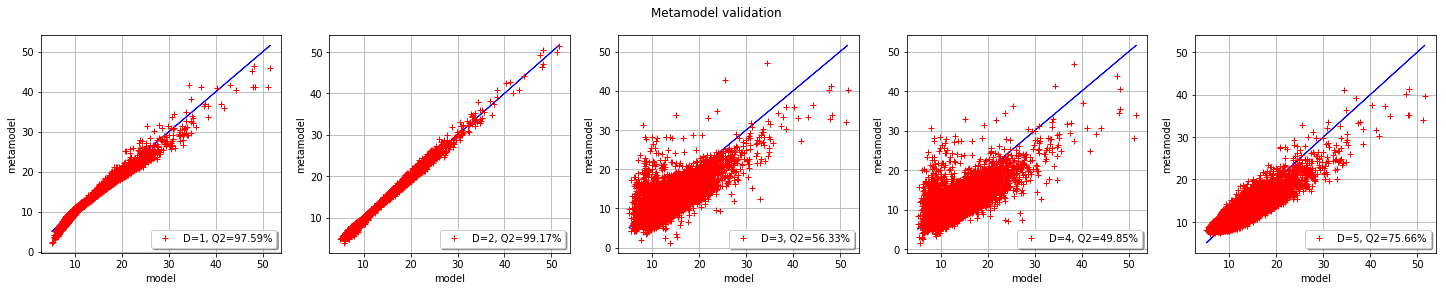

In [51]:
ot.RandomGenerator.SetSeed(43) # 127 est pas mal non plus
inputTrain = myDistribution.getSample(N)
outputTrain = g(inputTrain)
inputTest = myDistribution.getSample(n_valid)
outputTest = g(inputTest)
fig = plt.figure(figsize=(25, 4))
maxDegree = 6
for totalDegree in range(1,maxDegree):
    chaosResult = mySparseFixedLeastSquaresChaos(inputTrain,outputTrain,multivariateBasis,totalDegree,myDistribution)
    graph = printQ2Chaos(multivariateBasis,chaosResult,inputTest,outputTest,totalDegree)
    ax = fig.add_subplot(1, maxDegree-1, totalDegree)
    _ = ot.viewer.View(graph, figure=fig, axes=[ax])

La boucle suivante recherche la valeur de la graîne permettant de montrer quelque chose d'intéressant.

Attempt #0
Attempt #1
Attempt #2
Attempt #3
Attempt #4
Attempt #5
Attempt #6
Attempt #7
Attempt #8
Attempt #9
Attempt #10
Attempt #11
Attempt #12
Attempt #13
Attempt #14
Attempt #15
Attempt #16
Attempt #17
Attempt #18
Attempt #19
Attempt #20
Attempt #21
Attempt #22
Attempt #23
Attempt #24
Attempt #25
Attempt #26
Attempt #27
Attempt #28
Attempt #29
Attempt #30
Attempt #31
Attempt #32
Attempt #33
Attempt #34
Attempt #35
Attempt #36
Attempt #37
Attempt #38
Attempt #39
Attempt #40
Attempt #41
Attempt #42
Attempt #43
Attempt #44
Attempt #45
Attempt #46
Attempt #47
Attempt #48
Attempt #49
Attempt #50
Attempt #51
Attempt #52
Attempt #53
Attempt #54
Attempt #55
Attempt #56
Attempt #57
Attempt #58
Attempt #59
Attempt #60
Attempt #61
Attempt #62
Attempt #63
Attempt #64
Attempt #65
Attempt #66
Attempt #67
Attempt #68
Attempt #69
Attempt #70
Attempt #71
Attempt #72
Attempt #73
Attempt #74
Attempt #75
Attempt #76
Attempt #77
Attempt #78
Attempt #79
Attempt #80
Attempt #81
Attempt #82
Attempt #83
At

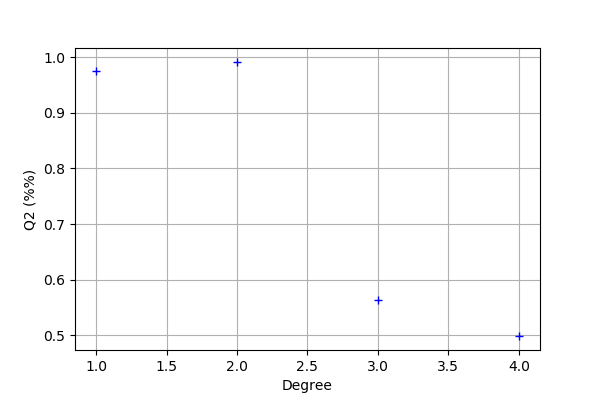

In [50]:
attempt = 0
while(True):
    print("Attempt #%d" % (attempt))
    ot.RandomGenerator.SetSeed(attempt)
    inputTrain = myDistribution.getSample(N)
    outputTrain = g(inputTrain)
    inputTest = myDistribution.getSample(n_valid)
    outputTest = g(inputTest)
    maxDegree = 5
    Q2array = ot.Sample(maxDegree-1,1)
    for totalDegree in range(1,maxDegree):
        chaosResult = mySparseFixedLeastSquaresChaos(inputTrain,outputTrain,multivariateBasis,totalDegree,myDistribution)
        Q2array[totalDegree-1,0] = computeQ2Chaos(chaosResult,inputTest,outputTest)
    attempt+=1
    if (Q2array[-1,0]>0.1) and (Q2array[-1,0]<0.5):
        break
graph = ot.Graph("","Degree","Q2 (%%)",True,"topright")
cloud = ot.Cloud(ot.Sample(range(1,maxDegree),1),Q2array)
graph.add(cloud)
graph

In [40]:
def computeSparsityRate(multivariateBasis,totalDegree,chaosResult):
    '''Compute the sparsity rate, assuming a FixedStrategy.'''
    enumfunc = multivariateBasis.getEnumerateFunction()
    P = enumfunc.getStrataCumulatedCardinal(totalDegree)
    truncationStrategy = ot.FixedStrategy(multivariateBasis, P)
    enumfunc = multivariateBasis.getEnumerateFunction()
    P = enumfunc.getStrataCumulatedCardinal(totalDegree)
    indices = chaosResult.getIndices()
    nbcoeffs = indices.getSize()
    sparsityRate = nbcoeffs / P
    return sparsityRate

In [45]:
def computeQ2Chaos(chaosResult,inputTest,outputTest):
    metamodel = chaosResult.getMetaModel()
    val = ot.MetaModelValidation(inputTest, outputTest, metamodel)
    Q2 = val.computePredictivityFactor()
    Q2 = max(Q2,0.)
    return Q2

Répétons l'expérience pour observer la variabilité du Q2.

In [78]:
def computeSampleQ2(N,n_valid,numberAttempts,maxDegree):
    '''For a given sample size N, 
    for degree from 1 to maxDegree, 
    repeat the following experiment numberAttempts times:
    create a sparse least squares chaos and compute the Q2 using n_valid
    '''
    Q2sample = ot.Sample(numberAttempts,maxDegree)
    for totalDegree in range(1,maxDegree+1):
        print("Degree = %d" % (totalDegree))
        for i in range(numberAttempts):
            inputTrain = myDistribution.getSample(N)
            outputTrain = g(inputTrain)
            inputTest = myDistribution.getSample(n_valid)
            outputTest = g(inputTest)
            chaosResult = mySparseFixedLeastSquaresChaos(inputTrain,outputTrain,multivariateBasis,totalDegree,myDistribution)
            Q2sample[i,totalDegree-1] = computeQ2Chaos(chaosResult,inputTest,outputTest)
    return Q2sample

In [76]:
def plotQ2Boxplots(Q2sample,N):
    data = np.array(Q2sample)
    plt.figure()
    plt.boxplot(data)
    plt.title("N=%d" % (N))
    plt.xlabel("Degree")
    plt.ylabel("Q2 (%)")
    plt.show()
    return

Degree = 1
Degree = 2
Degree = 3
Degree = 4
Degree = 5
Degree = 6
Degree = 7


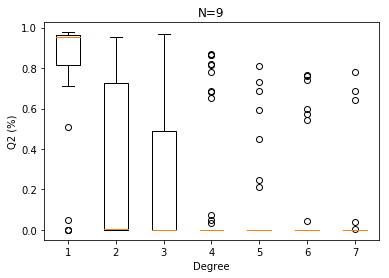

In [82]:
N = 10 # size of the train design
n_valid = 10000 # size of the test design
numberAttempts = 50
maxDegree = 7
Q2sample = computeSampleQ2(N,n_valid,numberAttempts,maxDegree)
plotQ2Boxplots(Q2sample,N)

Degree = 1
Degree = 2
Degree = 3
Degree = 4
Degree = 5
Degree = 6
Degree = 7


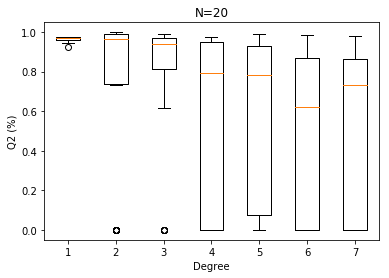

In [79]:
N = 20 # size of the train design
n_valid = 10000 # size of the test design
numberAttempts = 50
maxDegree = 7
Q2sample = computeSampleQ2(N,n_valid,numberAttempts,maxDegree)
plotQ2Boxplots(Q2sample,N)

Degree = 1
Degree = 2
Degree = 3
Degree = 4
Degree = 5


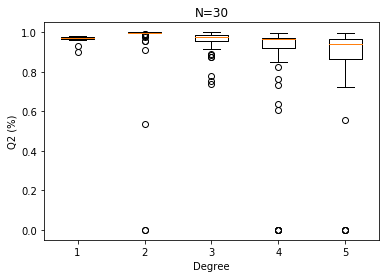

In [83]:
N = 30 # size of the train design
n_valid = 10000 # size of the test design
numberAttempts = 50
maxDegree = 5
Q2sample = computeSampleQ2(N,n_valid,numberAttempts,maxDegree)
plotQ2Boxplots(Q2sample,N)

Degree = 1
Degree = 2
Degree = 3
Degree = 4
Degree = 5
Degree = 6
Degree = 7


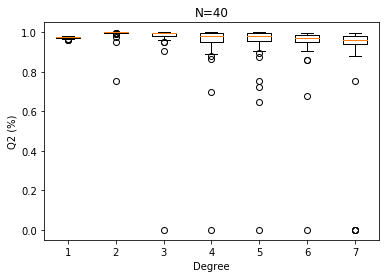

In [80]:
N = 40 # size of the train design
n_valid = 10000 # size of the test design
numberAttempts = 50
maxDegree = 7
Q2sample = computeSampleQ2(N,n_valid,numberAttempts,maxDegree)
plotQ2Boxplots(Q2sample,N)

Degree = 1
Degree = 2
Degree = 3
Degree = 4
Degree = 5


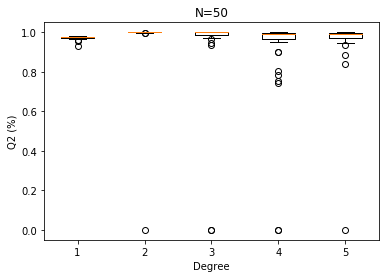

In [81]:
N = 50 # size of the train design
n_valid = 10000 # size of the test design
numberAttempts = 50
maxDegree = 5
Q2sample = computeSampleQ2(N,n_valid,numberAttempts,maxDegree)
plotQ2Boxplots(Q2sample,N)

Degree = 1
Degree = 2
Degree = 3
Degree = 4
Degree = 5


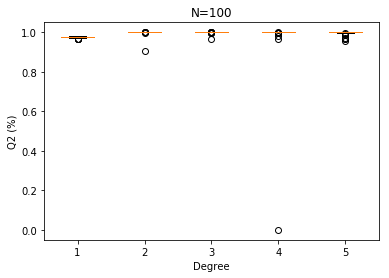

In [85]:
N = 100 # size of the train design
n_valid = 10000 # size of the test design
numberAttempts = 50
maxDegree = 5
Q2sample = computeSampleQ2(N,n_valid,numberAttempts,maxDegree)
plotQ2Boxplots(Q2sample,N)

## Avec des polynômes de Hermite pour la LN

On se demande si la famille de polynômes orthogonaux associé à la loi log-normale peut jouer un rôle. On utilise plutôt des polynômes d'Hermite à la place.

In [87]:
[dist_E, dist_F, dist_L, dist_I]
polyColl = []
polyColl.append(ot.StandardDistributionPolynomialFactory(dist_E))
polyColl.append(ot.HermiteFactory())
polyColl.append(ot.StandardDistributionPolynomialFactory(dist_L))
polyColl.append(ot.StandardDistributionPolynomialFactory(dist_I))
multivariateBasis = ot.OrthogonalProductPolynomialFactory(polyColl)

Degree = 1
Degree = 2
Degree = 3
Degree = 4
Degree = 5
Degree = 6
Degree = 7


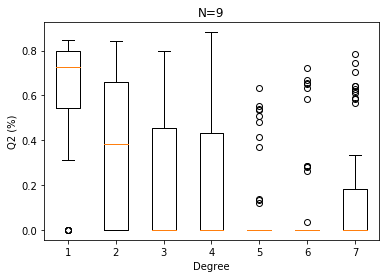

In [89]:
N = 10 # size of the train design
n_valid = 10000 # size of the test design
numberAttempts = 50
maxDegree = 7
Q2sample = computeSampleQ2(N,n_valid,numberAttempts,maxDegree)
plotQ2Boxplots(Q2sample,N)

Degree = 1
Degree = 2
Degree = 3
Degree = 4
Degree = 5
Degree = 6
Degree = 7


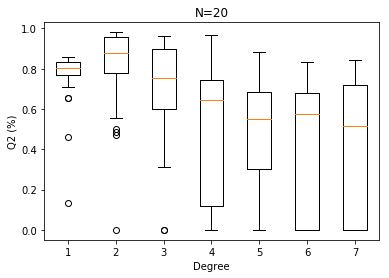

In [88]:
N = 20 # size of the train design
n_valid = 10000 # size of the test design
numberAttempts = 50
maxDegree = 7
Q2sample = computeSampleQ2(N,n_valid,numberAttempts,maxDegree)
plotQ2Boxplots(Q2sample,N)

Degree = 1
Degree = 2
Degree = 3
Degree = 4
Degree = 5
Degree = 6
Degree = 7


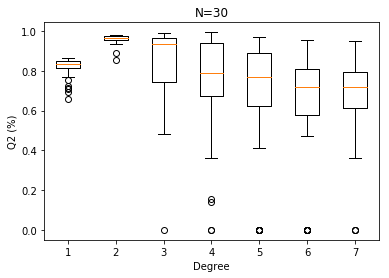

In [90]:
N = 30 # size of the train design
n_valid = 10000 # size of the test design
numberAttempts = 50
maxDegree = 7
Q2sample = computeSampleQ2(N,n_valid,numberAttempts,maxDegree)
plotQ2Boxplots(Q2sample,N)

Degree = 1
Degree = 2
Degree = 3
Degree = 4
Degree = 5
Degree = 6
Degree = 7


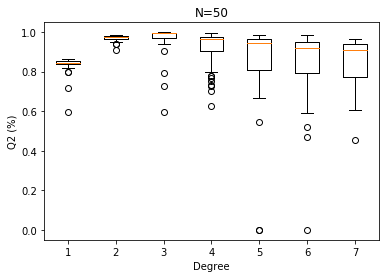

In [91]:
N = 50 # size of the train design
n_valid = 10000 # size of the test design
numberAttempts = 50
maxDegree = 7
Q2sample = computeSampleQ2(N,n_valid,numberAttempts,maxDegree)
plotQ2Boxplots(Q2sample,N)